In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Vivek Raj\Desktop\project\travel insurance.csv")

In [3]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [4]:
df.shape

(63326, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


45107 are null values in gender column

In [6]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [7]:
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

In [8]:
df_copy=df.copy()

In [9]:
x=len(np.where(df['Net Sales']<0)[0])
x

678

In [10]:
df['Net Sales']=df['Net Sales'].abs()

In [11]:
x=len(np.where(df['Net Sales']<0)[0])
x

0

In [12]:
df.describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,42.007265,9.809992,39.969981
std,101.791566,47.727754,19.804388,14.017010
min,-2.000000,0.000000,0.000000,0.000000
25%,9.000000,18.500000,0.000000,35.000000
50%,22.000000,27.000000,0.000000,36.000000
75%,53.000000,49.500000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [13]:
np.where(df['Duration']<0)

(array([14943, 52587, 52588, 56668, 59528], dtype=int64),)

In [14]:
df[df['Duration']<0]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
14943,JZI,Airlines,Online,Basic Plan,No,-2,BANGLADESH,22.0,7.7,M,118
52587,JZI,Airlines,Online,Basic Plan,No,-1,MALAYSIA,18.0,6.3,NaN,118
52588,JZI,Airlines,Online,Basic Plan,No,-1,BRUNEI DARUSSALAM,18.0,6.3,NaN,118
56668,JZI,Airlines,Online,Basic Plan,No,-1,INDONESIA,18.0,6.3,NaN,118
59528,JZI,Airlines,Online,Basic Plan,No,-1,CHINA,22.0,7.7,NaN,118


In [15]:
df=df.drop(df[df['Duration']<0].index)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63321 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63321 non-null  object 
 1   Agency Type           63321 non-null  object 
 2   Distribution Channel  63321 non-null  object 
 3   Product Name          63321 non-null  object 
 4   Claim                 63321 non-null  object 
 5   Duration              63321 non-null  int64  
 6   Destination           63321 non-null  object 
 7   Net Sales             63321 non-null  float64
 8   Commision (in value)  63321 non-null  float64
 9   Gender                18218 non-null  object 
 10  Age                   63321 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.8+ MB


In [17]:
df[df['Duration']<0]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age


In [18]:
## In the gender column most most value is NaN SO we can just drop the gender column
df=df.drop(columns="Gender")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63321 entries, 0 to 63325
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63321 non-null  object 
 1   Agency Type           63321 non-null  object 
 2   Distribution Channel  63321 non-null  object 
 3   Product Name          63321 non-null  object 
 4   Claim                 63321 non-null  object 
 5   Duration              63321 non-null  int64  
 6   Destination           63321 non-null  object 
 7   Net Sales             63321 non-null  float64
 8   Commision (in value)  63321 non-null  float64
 9   Age                   63321 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 5.3+ MB


In [20]:
len(df['Product Name'].unique())

26

In [21]:
len(df['Destination'].unique())

149

## Monovariate Analysis

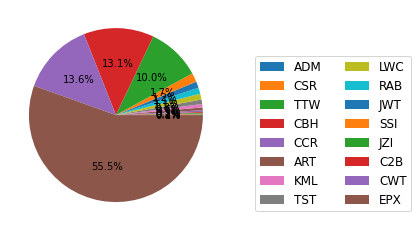

In [22]:
df2=df.groupby("Agency").size().reset_index(name="counts").sort_values(by=['counts'])
plt.pie(df2.counts,autopct='%.1f%%')
plt.legend(labels = df2['Agency'],fontsize=12, loc='upper center', 
           bbox_to_anchor=(1.5, 0.8), ncol=2)


plt.show()

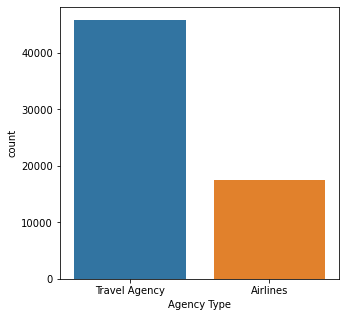

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Agency Type'])
plt.show()

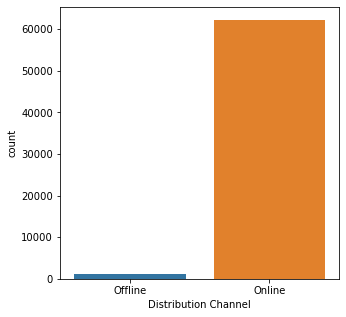

In [24]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Distribution Channel'])
plt.show()

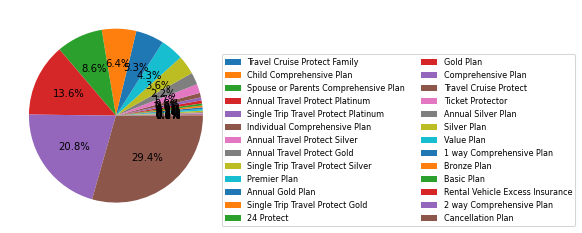

In [25]:
df1=df.groupby("Product Name").size().reset_index(name="counts").sort_values(by=['counts'])
plt.pie(df1.counts,autopct='%.1f%%')
plt.legend(labels = df1['Product Name'],fontsize=8, loc='upper center', 
           bbox_to_anchor=(1.8, 0.8), ncol=2)


plt.show()

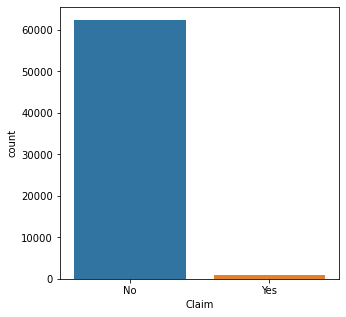

In [26]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Claim'])
plt.show()

Here we can clearly see that is unbalanced dataset

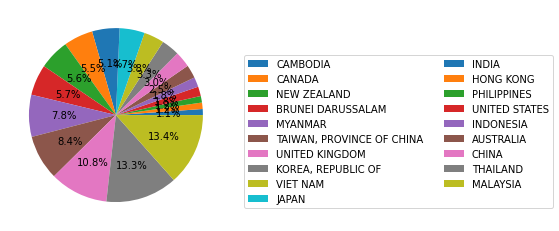

In [27]:
## Top 20 countries where travel insurance has done

df3=df.groupby("Destination").size().reset_index(name="counts").sort_values(by=['counts'])
df3=df3[-20:-1]
plt.pie(df3.counts,autopct='%.1f%%')
plt.legend(labels = df3['Destination'],fontsize=10, loc='upper center', 
           bbox_to_anchor=(1.8, 0.8), ncol=2)


plt.show()


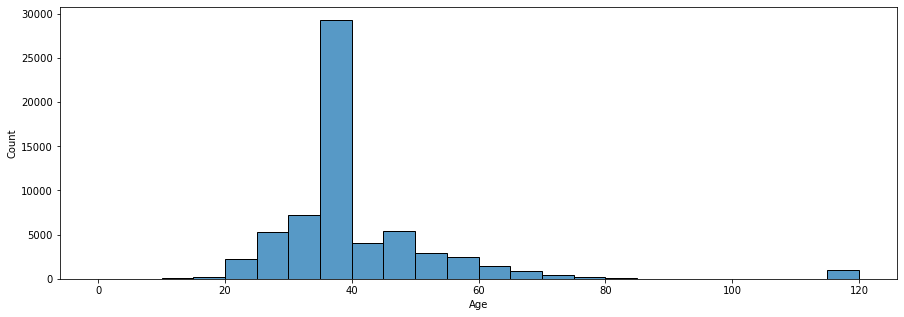

In [28]:
plt.figure(figsize=(15,5))
sns.histplot(x=df.Age,binwidth=5)
plt.show()

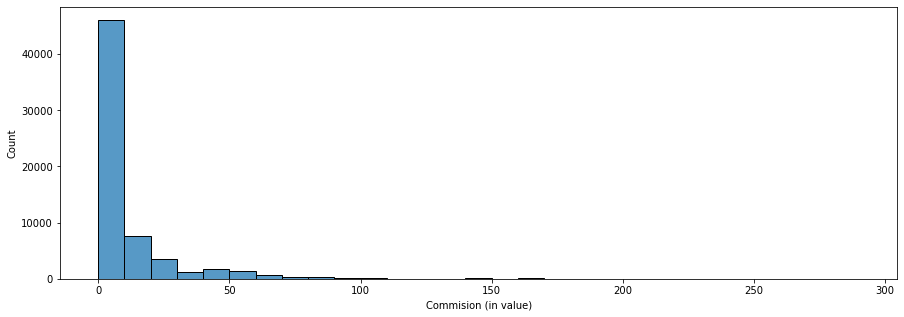

In [29]:
plt.figure(figsize=(15,5))
sns.histplot(x=df["Commision (in value)"],binwidth=10)
plt.show()

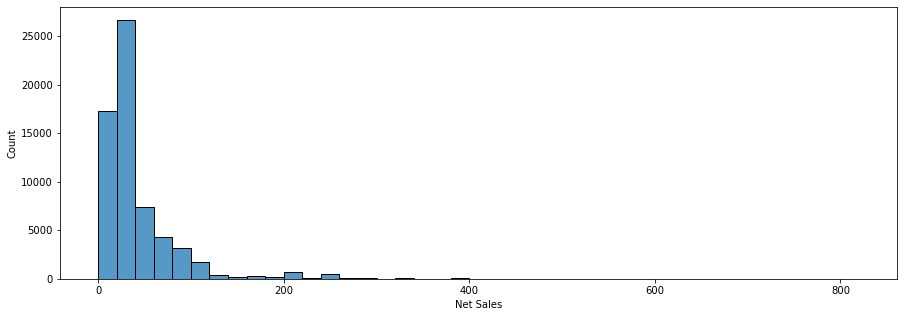

In [30]:
plt.figure(figsize=(15,5))
sns.histplot(x=df["Net Sales"],binwidth=20)
plt.show()

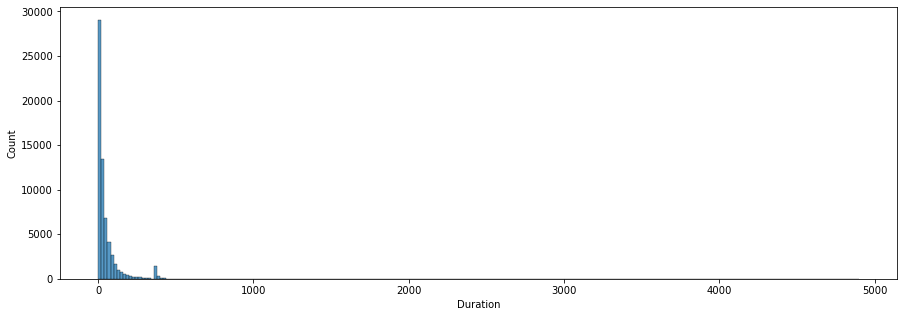

In [31]:
plt.figure(figsize=(15,5))
sns.histplot(x=df["Duration"],binwidth=20)
plt.show()

## Boxplot

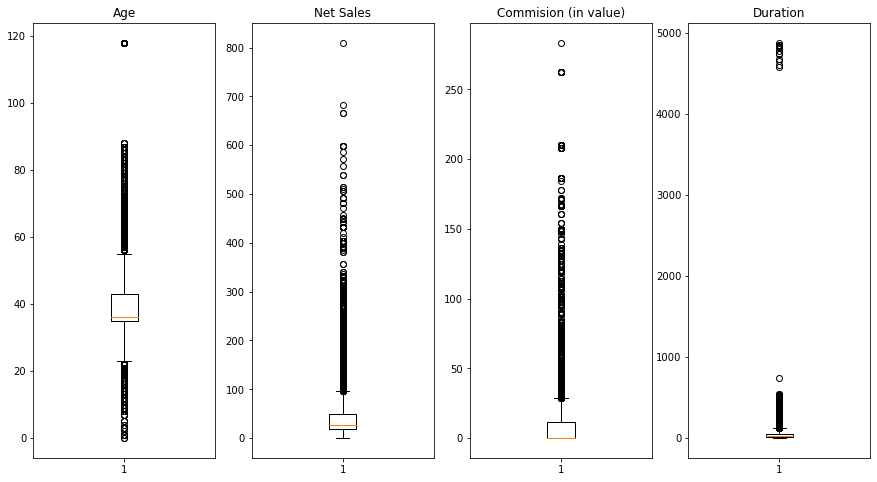

In [32]:
fig,ax=plt.subplots(1,4)
l=["Age",'Net Sales',"Commision (in value)","Duration"]
for i in range(4):
    ax[i].boxplot(df[l[i]])
    ax[i].set_title(l[i],)
    fig.set_figheight(8)
    fig.set_figwidth(15)
plt.show()

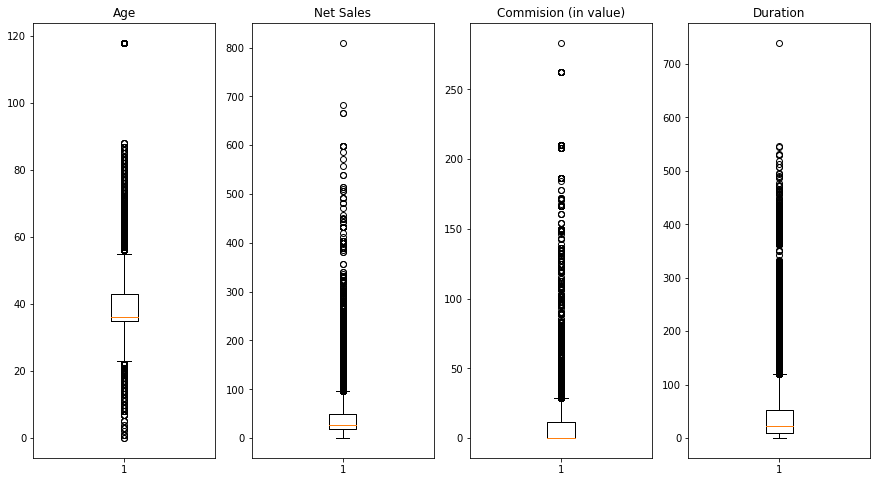

In [33]:
fig,ax=plt.subplots(1,4)
l=["Age",'Net Sales',"Commision (in value)","Duration"]
for i in range(4):
    ax[i].boxplot(df[df["Duration"]<4000][l[i]])
    ax[i].set_title(l[i],)
    fig.set_figheight(8)
    fig.set_figwidth(15)
plt.show()

In [34]:
x=len(np.where(df['Duration']>4000)[0])
x

14

In [35]:
df[df['Duration']>4000]

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
3025,SSI,Airlines,Online,Ticket Protector,No,4881,SINGAPORE,0.13,0.04,48
6847,SSI,Airlines,Online,Ticket Protector,No,4857,SINGAPORE,0.32,0.09,48
8686,SSI,Airlines,Online,Ticket Protector,No,4847,SINGAPORE,0.32,0.09,48
9232,SSI,Airlines,Online,Ticket Protector,No,4844,SINGAPORE,0.32,0.09,48
12059,SSI,Airlines,Online,Ticket Protector,No,4831,SINGAPORE,0.32,0.09,48
12438,SSI,Airlines,Online,Ticket Protector,No,4829,SINGAPORE,0.32,0.09,48
15281,SSI,Airlines,Online,Ticket Protector,No,4815,SINGAPORE,0.32,0.09,48
21916,SSI,Airlines,Online,Ticket Protector,No,4784,SINGAPORE,0.32,0.09,48
30437,SSI,Airlines,Online,Ticket Protector,No,4738,SINGAPORE,0.32,0.09,48
30826,SSI,Airlines,Online,Ticket Protector,No,4736,SINGAPORE,0.32,0.09,48


As it seems outliers so we can remove these data points

In [36]:
df=df[df['Duration']<4000]

In [37]:
df[df['Destination']=='SINGAPORE'].describe()

,Duration,Net Sales,Commision (in value),Age
count,13241.000000,13241.000000,13241.000000,13241.000000
mean,75.033306,59.305241,13.078722,38.315157
std,120.988514,79.542931,20.876608,11.828469
min,0.000000,0.000000,0.000000,1.000000
25%,8.000000,16.000000,0.000000,30.000000
50%,20.000000,27.000000,5.000000,36.000000
75%,62.000000,60.000000,13.380000,45.000000
max,740.000000,682.000000,170.500000,118.000000


sns.pairplot(df,hue="Claim")

## Bivariate Analysis

## 1.Agency Type

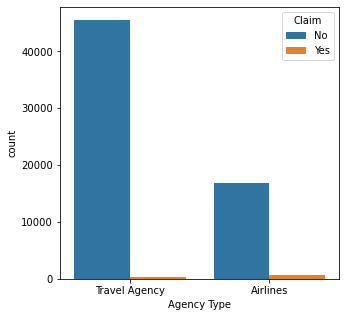

In [38]:
plt.figure(figsize=(5,5))
sns.countplot(x=df['Agency Type'],hue=df.Claim)
plt.show()

In [39]:
df.pivot_table(values="Age",index="Agency Type",columns="Claim",aggfunc="count")

Claim,No,Yes
Agency Type,,
Airlines,16847,591
Travel Agency,45533,336


In [40]:
meanAgencyType=df.pivot_table(values=["Net Sales","Commision (in value)","Duration","Age"],index="Agency Type",aggfunc="mean")
medianAgencyType=df.pivot_table(values=["Net Sales","Commision (in value)","Duration","Age"],index="Agency Type",aggfunc="median")
Agency_Type_Stats=meanAgencyType.merge(medianAgencyType,how="inner",on="Agency Type")

In [41]:
Agency_Type_Stats.rename(columns = {'Age_x':'mean_age', 'Commision (in value)_x':'mean_comission','Duration_x':'mean_duration','Net Sales_x':'mean_sales',
                               'Age_y':'median_age', 'Commision (in value)_y':'median_comission','Duration_y':'median_duration','Net Sales_y':'median_sales'}, inplace = True)

In [42]:
Agency_Type_Stats

,mean_age,mean_comission,mean_duration,mean_sales,median_age,median_comission,median_duration,median_sales
Agency Type,,,,,,,,
Airlines,44.979413,15.541282,63.978839,54.003980,41,9.1,20,27.0
Travel Agency,38.054590,7.634419,42.309795,37.461648,36,0.0,23,27.0


## 2.Agency

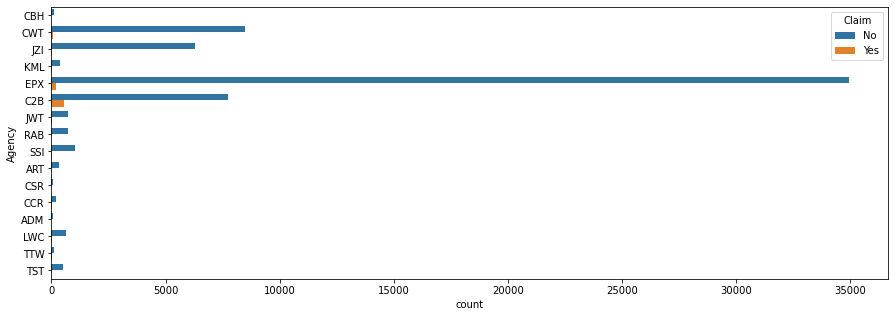

In [43]:
plt.figure(figsize=(15,5))
sns.countplot(y=df['Agency'],hue=df.Claim)
plt.show()

In [44]:
df.pivot_table(values="Age",index="Agency",columns="Claim",aggfunc="count").sort_values(['Yes'],ascending=False)

Claim,No,Yes
Agency,,
C2B,7720.0,547.0
EPX,34924.0,195.0
CWT,8494.0,86.0
LWC,653.0,36.0
JZI,6293.0,31.0
KML,384.0,8.0
SSI,1035.0,7.0
JWT,745.0,4.0
TTW,94.0,4.0


In [45]:
meanAgency_Net_Sales=df.pivot_table(values=["Net Sales","Commision (in value)","Duration","Age"],index="Agency",aggfunc="mean")
# meanAgency_Net_Sales

In [46]:
medianAgency_Net_Sales=df.pivot_table(values=["Net Sales","Commision (in value)","Duration","Age"],index="Agency",aggfunc="median")

In [47]:
Agenacy_Stats=meanAgency_Net_Sales.merge(medianAgency_Net_Sales,how="inner",on="Agency")
Agenacy_Stats.rename(columns = {'Age_x':'mean_age', 'Commision (in value)_x':'mean_comission','Duration_x':'mean_duration','Net Sales_x':'mean_sales',
                               'Age_y':'median_age', 'Commision (in value)_y':'median_comission','Duration_y':'median_duration','Net Sales_y':'median_sales'}, inplace = True)
Agenacy_Stats.round()

,mean_age,mean_comission,mean_duration,mean_sales,median_age,median_comission,median_duration,median_sales
Agency,,,,,,,,
ADM,24.0,38.0,55.0,82.0,22.0,34.0,42.0,86.0
ART,60.0,11.0,30.0,29.0,48.0,8.0,14.0,23.0
C2B,38.0,21.0,95.0,80.0,34.0,10.0,21.0,36.0
CBH,57.0,10.0,92.0,28.0,65.0,10.0,64.0,29.0
CCR,68.0,10.0,63.0,31.0,67.0,10.0,45.0,29.0
CSR,58.0,11.0,80.0,33.0,64.0,10.0,58.0,29.0
CWT,40.0,32.0,41.0,48.0,38.0,24.0,24.0,40.0
EPX,37.0,0.0,39.0,33.0,36.0,0.0,22.0,22.0
JWT,118.0,22.0,29.0,54.0,118.0,16.0,16.0,39.0


## 3.Distribution Channel

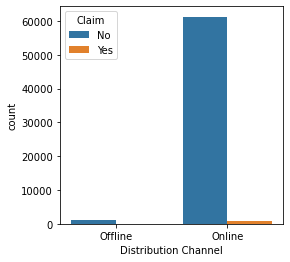

In [48]:
plt.figure(figsize=(4,4))
sns.countplot(x=df['Distribution Channel'],hue=df.Claim)
plt.show()

In [49]:
df.pivot_table(values="Age",index="Distribution Channel",columns="Claim",aggfunc="count")

Claim,No,Yes
Distribution Channel,,
Offline,1090,17
Online,61290,910


In [50]:
meanDistributionChannel_Net_Sales=df.pivot_table(values=["Net Sales","Commision (in value)","Duration","Age"],index="Distribution Channel",aggfunc="mean")
# meanDistributionChannel_Net_Sales

In [51]:
medianDistributionChannel_Net_Sales=df.pivot_table(values=["Net Sales","Commision (in value)","Duration","Age"],index="Distribution Channel",aggfunc="median")

In [52]:
DC_Stats=meanDistributionChannel_Net_Sales.merge(meanDistributionChannel_Net_Sales,how="inner",on="Distribution Channel")
DC_Stats.rename(columns = {'Age_x':'mean_age', 'Commision (in value)_x':'mean_comission','Duration_x':'mean_duration','Net Sales_x':'mean_sales',
                               'Age_y':'median_age', 'Commision (in value)_y':'median_comission','Duration_y':'median_duration','Net Sales_y':'median_sales'}, inplace = True)
DC_Stats.round()

,mean_age,mean_comission,mean_duration,mean_sales,median_age,median_comission,median_duration,median_sales
Distribution Channel,,,,,,,,
Offline,57.0,9.0,80.0,37.0,57.0,9.0,80.0,37.0
Online,40.0,10.0,48.0,42.0,40.0,10.0,48.0,42.0


## 4.Product Name

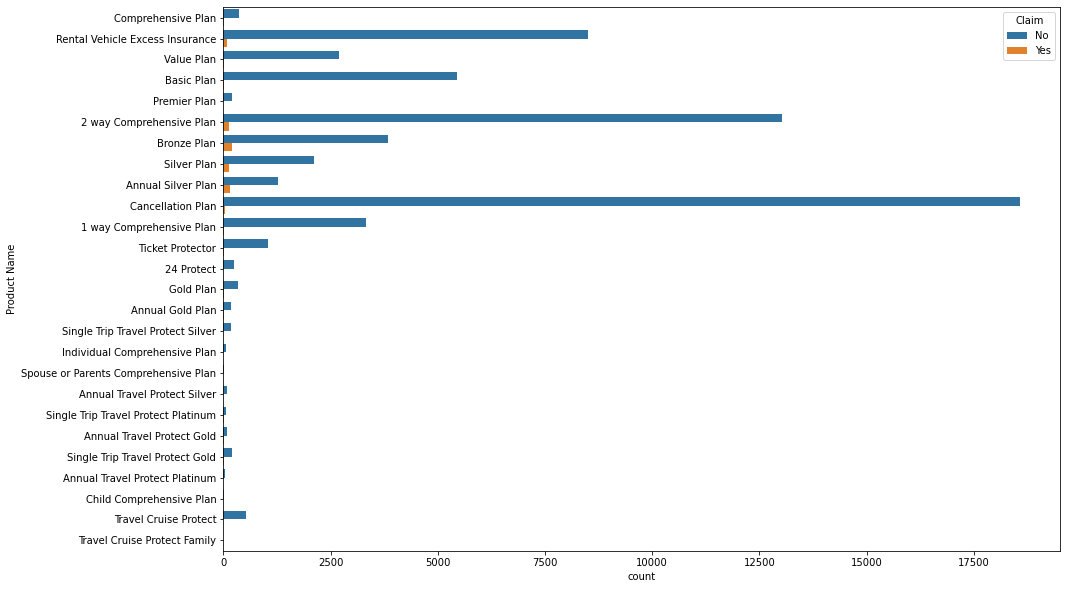

In [53]:
plt.figure(figsize=(15,10))
sns.countplot(y=df['Product Name'],hue=df.Claim)
plt.show()

In [54]:
df.pivot_table(values="Age",index="Product Name",columns="Claim",aggfunc="count").sort_values(['Yes'],ascending=False)

Claim,No,Yes
Product Name,,
Bronze Plan,3839.0,210.0
Annual Silver Plan,1266.0,157.0
2 way Comprehensive Plan,13016.0,142.0
Silver Plan,2108.0,141.0
Rental Vehicle Excess Insurance,8494.0,86.0
Cancellation Plan,18586.0,44.0
Basic Plan,5441.0,23.0
Annual Gold Plan,173.0,21.0
Value Plan,2696.0,19.0


In [55]:
meanProductName=df.pivot_table(values=["Net Sales","Commision (in value)","Duration","Age"],index="Product Name",aggfunc="mean")
medianProductName=df.pivot_table(values=["Net Sales","Commision (in value)","Duration","Age"],index="Product Name",aggfunc="median")
Product_Stats=meanProductName.merge(medianProductName,how="inner",on="Product Name")
Product_Stats.rename(columns = {'Age_x':'mean_age', 'Commision (in value)_x':'mean_comission','Duration_x':'mean_duration','Net Sales_x':'mean_sales',
                               'Age_y':'median_age', 'Commision (in value)_y':'median_comission','Duration_y':'median_duration','Net Sales_y':'median_sales'}, inplace = True)
Product_Stats.round()
Product_Stats

,mean_age,mean_comission,mean_duration,mean_sales,median_age,median_comission,median_duration,median_sales
Product Name,,,,,,,,
1 way Comprehensive Plan,36.616632,0.000000,22.637646,27.982888,36.0,0.000,10.0,20.00
2 way Comprehensive Plan,37.430689,0.000000,42.957972,43.060724,36.0,0.000,27.0,31.00
24 Protect,48.550607,8.511943,30.186235,23.614251,48.0,5.930,12.0,16.00
Annual Gold Plan,44.170103,88.920619,373.396907,339.565206,42.0,83.250,367.0,333.00
Annual Silver Plan,40.431483,56.985200,375.777231,224.880049,37.0,54.000,368.0,216.00
Annual Travel Protect Gold,38.990000,161.536200,381.070000,246.940500,37.0,166.530,371.0,256.20
Annual Travel Protect Platinum,43.113208,215.935849,378.056604,332.209434,42.0,210.210,371.0,323.40
Annual Travel Protect Silver,40.313953,136.168837,393.546512,200.596512,36.5,149.370,374.5,229.80
Basic Plan,44.371889,9.540126,33.120059,26.747255,43.0,7.700,19.0,22.00


## 5.Destination

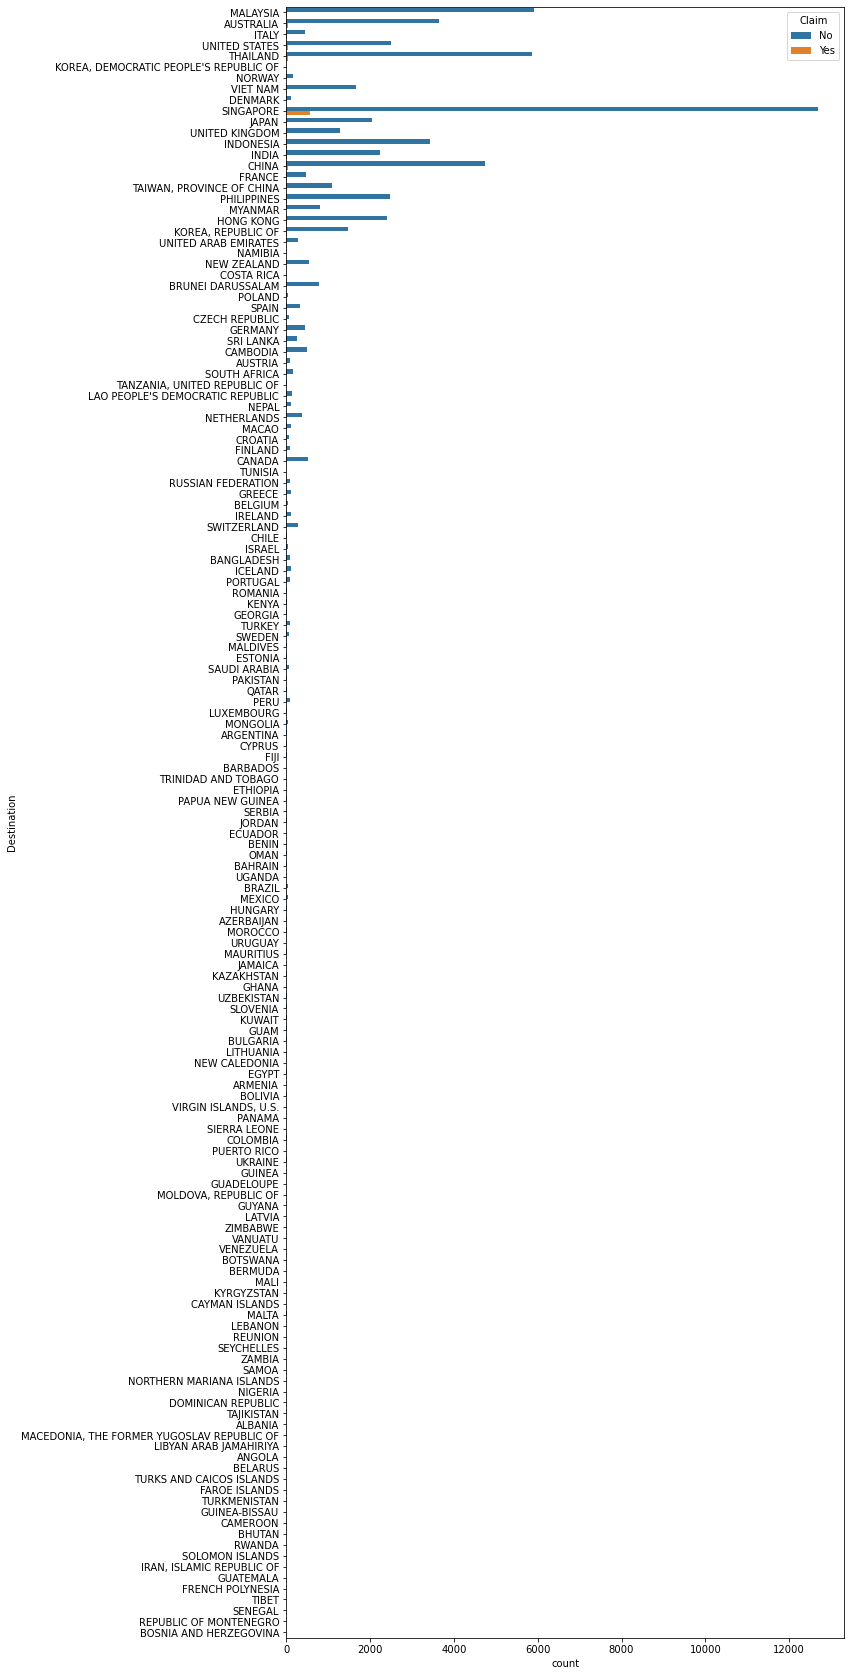

In [56]:
plt.figure(figsize=(10,30))
sns.countplot(y=df['Destination'],hue=df.Claim)
plt.show()

In [57]:
df.pivot_table(values="Age",index="Destination",columns="Claim",aggfunc="count").sort_values(['Yes'],ascending=False)

Claim,No,Yes
Destination,,
SINGAPORE,12679.0,562.0
CHINA,4749.0,46.0
AUSTRALIA,3656.0,38.0
UNITED STATES,2493.0,37.0
THAILAND,5860.0,34.0
...,...,...
VANUATU,5.0,NaN
VENEZUELA,5.0,NaN
"VIRGIN ISLANDS, U.S.",1.0,NaN


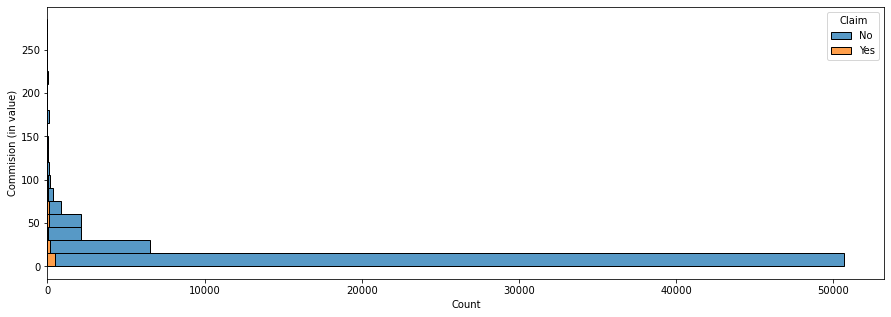

In [58]:
plt.figure(figsize=(15,5))
sns.histplot(y=df["Commision (in value)"],hue=df.Claim,binwidth=15,multiple='stack')
plt.show()

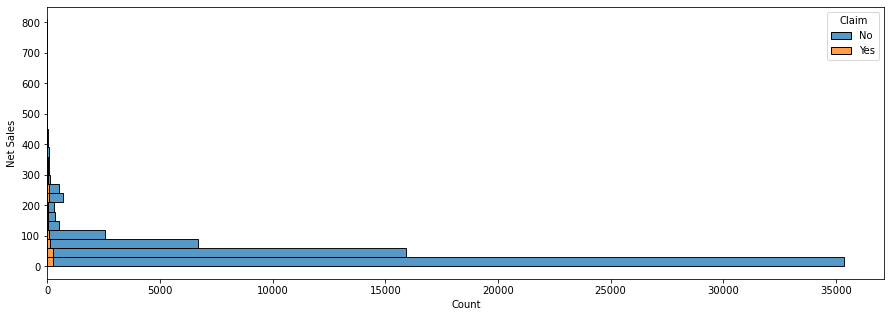

In [59]:
plt.figure(figsize=(15,5))
sns.histplot(y=df["Net Sales"],hue=df.Claim,binwidth=30,multiple='stack')
plt.show()

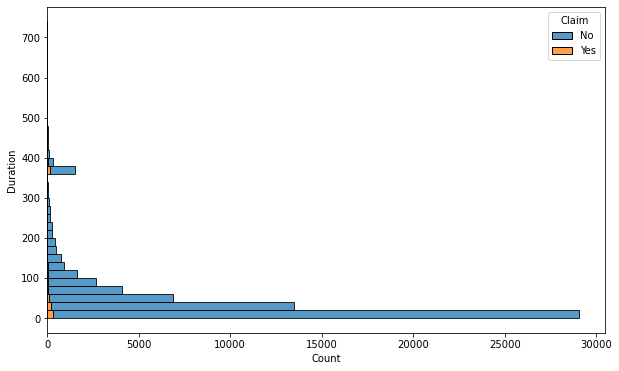

In [60]:
plt.figure(figsize=(10,6))
sns.histplot(y=df["Duration"],hue=df.Claim,binwidth=20,multiple='stack')
plt.show()

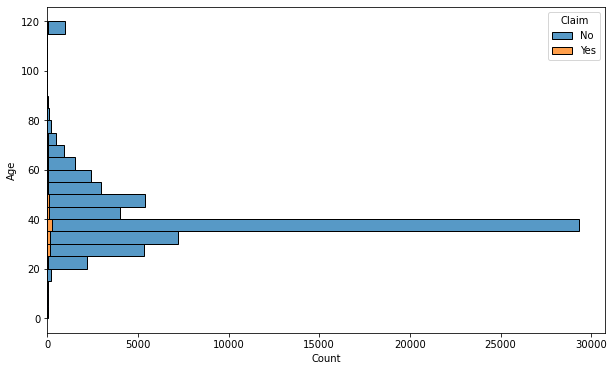

In [61]:
plt.figure(figsize=(10,6))
sns.histplot(y=df["Age"],hue=df.Claim,binwidth=5,multiple='stack')
plt.show()

In [62]:
# df.Duration.describe()

In [63]:
df.corr()

,Duration,Net Sales,Commision (in value),Age
Duration,1.000000,0.644048,0.482536,-0.004399
Net Sales,0.644048,1.000000,0.709231,0.039750
Commision (in value),0.482536,0.709231,1.000000,0.118629
Age,-0.004399,0.039750,0.118629,1.000000


<AxesSubplot:>

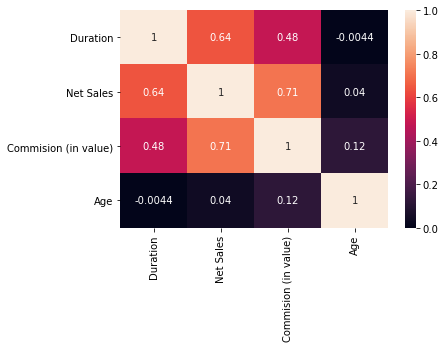

In [64]:
sns.heatmap(df.corr(),vmin=0,vmax=1,annot=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63307 entries, 0 to 63325
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63307 non-null  object 
 1   Agency Type           63307 non-null  object 
 2   Distribution Channel  63307 non-null  object 
 3   Product Name          63307 non-null  object 
 4   Claim                 63307 non-null  object 
 5   Duration              63307 non-null  int64  
 6   Destination           63307 non-null  object 
 7   Net Sales             63307 non-null  float64
 8   Commision (in value)  63307 non-null  float64
 9   Age                   63307 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 7.8+ MB


In [66]:
df=pd.get_dummies(df,columns=["Agency","Agency Type","Distribution Channel","Product Name","Claim","Destination"],drop_first=True)

In [67]:
df.head()

,Duration,Net Sales,Commision (in value),Age,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,...,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_URUGUAY,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,"Destination_VIRGIN ISLANDS, U.S.",Destination_ZAMBIA,Destination_ZIMBABWE
0,186,29.0,9.57,81,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,186,29.0,9.57,71,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,65,49.5,29.70,32,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,60,39.6,23.76,32,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,79,19.8,11.88,41,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df.shape

(63307, 195)

In [69]:
df['Claim_Yes']

0        0
1        0
2        0
3        0
4        0
        ..
63321    0
63322    0
63323    0
63324    0
63325    0
Name: Claim_Yes, Length: 63307, dtype: uint8

In [70]:
x=df.drop(columns="Claim_Yes")
y=df['Claim_Yes']

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb


from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report,roc_curve,roc_auc_score


In [72]:
x_train , x_test , y_train , y_test = train_test_split(x,y ,test_size = 0.1 ,random_state =0)

In [73]:
model_lr=LogisticRegression()
model_lr.fit(x_train,y_train)


C:\download\ANACONDAC\download\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [74]:
print("accuracy : ",accuracy_score(y_test,model_lr.predict(x_test)))
print(classification_report(y_true=y_test, y_pred=model_lr.predict(x_test)))

accuracy :  0.9854683304375296
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6239
           1       0.00      0.00      0.00        92

    accuracy                           0.99      6331
   macro avg       0.49      0.50      0.50      6331
weighted avg       0.97      0.99      0.98      6331



C:\download\ANACONDAC\download\ANACONDA\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [75]:
model_knn=KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [76]:
print("accuracy : ",accuracy_score(y_test,model_knn.predict(x_test)))
print(classification_report(y_true=y_test, y_pred=model_knn.predict(x_test)))

accuracy :  0.9832569894171537
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6239
           1       0.06      0.01      0.02        92

    accuracy                           0.98      6331
   macro avg       0.52      0.50      0.51      6331
weighted avg       0.97      0.98      0.98      6331



In [77]:
model_tree=tree.DecisionTreeClassifier(max_depth=5)
model_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [78]:
print("accuracy : ",accuracy_score(y_test,model_tree.predict(x_test)))
print(classification_report(y_true=y_test, y_pred=model_tree.predict(x_test)))

accuracy :  0.9853103775075027
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6239
           1       0.00      0.00      0.00        92

    accuracy                           0.99      6331
   macro avg       0.49      0.50      0.50      6331
weighted avg       0.97      0.99      0.98      6331



In [79]:
model_rf = RandomForestClassifier(n_estimators=100,random_state=42)
model_rf.fit(x_train, y_train)
print("accuracy : ",accuracy_score(y_test,model_rf.predict(x_test)))
print(classification_report(y_true=y_test, y_pred=model_rf.predict(x_test)))

accuracy :  0.9827831306270731
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6239
           1       0.00      0.00      0.00        92

    accuracy                           0.98      6331
   macro avg       0.49      0.50      0.50      6331
weighted avg       0.97      0.98      0.98      6331



## Resampling

## 1.Randomoversampler

In [80]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(x_train, y_train)


<AxesSubplot:xlabel='Claim_Yes', ylabel='count'>

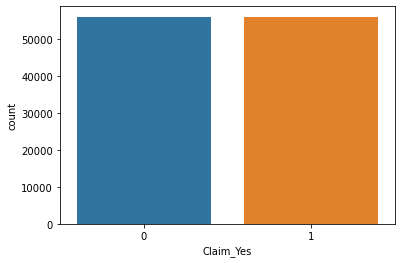

In [81]:
sns.countplot(x=y_ros)

In [82]:
model_lr=LogisticRegression()
model_lr.fit(x_ros,y_ros)
print("accuracy : ",accuracy_score(y_test,model_lr.predict(x_test)))
print(classification_report(y_true=y_test, y_pred=model_lr.predict(x_test)))

accuracy :  0.7858158268835886
              precision    recall  f1-score   support

           0       1.00      0.79      0.88      6239
           1       0.05      0.77      0.09        92

    accuracy                           0.79      6331
   macro avg       0.52      0.78      0.49      6331
weighted avg       0.98      0.79      0.87      6331



C:\download\ANACONDAC\download\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [83]:
model_knn=KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_ros,y_ros)
print("accuracy : ",accuracy_score(y_test,model_knn.predict(x_test)))
print(classification_report(y_true=y_test, y_pred=model_knn.predict(x_test)))

accuracy :  0.9409256041699574
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      6239
           1       0.05      0.18      0.08        92

    accuracy                           0.94      6331
   macro avg       0.52      0.57      0.53      6331
weighted avg       0.97      0.94      0.96      6331



In [84]:
model_tree=tree.DecisionTreeClassifier(max_depth=5)
model_tree.fit(x_ros,y_ros)
print("accuracy : ",accuracy_score(y_test,model_tree.predict(x_test)))
print(classification_report(y_true=y_test, y_pred=model_tree.predict(x_test)))

accuracy :  0.6793555520454905
              precision    recall  f1-score   support

           0       1.00      0.68      0.81      6239
           1       0.04      0.82      0.07        92

    accuracy                           0.68      6331
   macro avg       0.52      0.75      0.44      6331
weighted avg       0.98      0.68      0.80      6331



In [85]:
model_rf = RandomForestClassifier(n_estimators=100,random_state=42)
model_rf.fit(x_ros, y_ros)
print("accuracy : ",accuracy_score(y_test,model_rf.predict(x_test)))
print(classification_report(y_true=y_test, y_pred=model_rf.predict(x_test)))

accuracy :  0.9753593429158111
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6239
           1       0.04      0.03      0.04        92

    accuracy                           0.98      6331
   macro avg       0.51      0.51      0.51      6331
weighted avg       0.97      0.98      0.97      6331



In [86]:
confusion_matrix(y_test,model_rf.predict(x_test))

array([[6172,   67],
       [  89,    3]], dtype=int64)

In [105]:
model_xgb = xgb.XGBClassifier()
model_xgb.fit(x_ros,y_ros)
print("accuracy : ",accuracy_score(y_test,model_xgb.predict(x_test)))
print(classification_report(y_true=y_test, y_pred=model_xgb.predict(x_test)))

C:\Users\vivekr\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\vivekr\Anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[15:52:10] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy :  0.9140750240461687
              precision    recall  f1-score   support

           0       0.96      0.87      0.91     12559
           1       0.88      0.96      0.92     12393

    accuracy                           0.91     24952
   macro avg       0.92      0.91      0.91     24952
weighted avg       0.92      0.91      0.91     24952



## 2.SMOTE

In [91]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

In [92]:
model_lr=LogisticRegression()
model_lr.fit(x_smote,y_smote)
print("accuracy : ",accuracy_score(y_test,model_lr.predict(x_test)))
print(classification_report(y_true=y_test, y_pred=model_lr.predict(x_test)))

accuracy :  0.7949770968251461
              precision    recall  f1-score   support

           0       1.00      0.79      0.88      6239
           1       0.05      0.79      0.10        92

    accuracy                           0.79      6331
   macro avg       0.53      0.79      0.49      6331
weighted avg       0.98      0.79      0.87      6331



C:\download\ANACONDAC\download\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [116]:
y_pred = model_lr.predict(x_test)
confusion_matrix(y_smote,y_smote)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,4960,1279,6239
1,19,73,92
All,4979,1352,6331


In [94]:
model_knn=KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_smote,y_smote)
print("accuracy : ",accuracy_score(y_test,model_knn.predict(x_test)))
print(classification_report(y_true=y_test, y_pred=model_knn.predict(x_test)))

accuracy :  0.9064918654241036
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      6239
           1       0.13      0.92      0.22        92

    accuracy                           0.91      6331
   macro avg       0.56      0.92      0.59      6331
weighted avg       0.99      0.91      0.94      6331



In [97]:
y_pred = model_knn.predict(x_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,5654,585,6239
1,7,85,92
All,5661,670,6331


In [91]:
model_tree=tree.DecisionTreeClassifier(max_depth=5)
model_tree.fit(x_smote,y_smote)
print("accuracy : ",accuracy_score(y_test,model_tree.predict(x_test)))
print(classification_report(y_true=y_test, y_pred=model_tree.predict(x_test)))

accuracy :  0.7803783263866624
              precision    recall  f1-score   support

           0       0.74      0.88      0.80     12559
           1       0.85      0.68      0.75     12393

    accuracy                           0.78     24952
   macro avg       0.79      0.78      0.78     24952
weighted avg       0.79      0.78      0.78     24952



In [98]:
y_pred = model_tree.predict(x_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,4226,2013,6239
1,17,75,92
All,4243,2088,6331


In [122]:
model_rf = RandomForestClassifier(n_estimators=100,random_state=42)
model_rf.fit(x_smote, y_smote)


accuracy :  0.9917864476386037
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6239
           1       0.65      0.96      0.77        92

    accuracy                           0.99      6331
   macro avg       0.82      0.97      0.88      6331
weighted avg       0.99      0.99      0.99      6331



In [125]:
print("accuracy : ",accuracy_score(y_test,model_rf.predict(x_test)))
print(classification_report(y_true=y_test, y_pred=model_rf.predict(x_test)))

accuracy :  0.9917864476386037
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      6239
           1       0.65      0.96      0.77        92

    accuracy                           0.99      6331
   macro avg       0.82      0.97      0.88      6331
weighted avg       0.99      0.99      0.99      6331



In [129]:
y_pred = model_rf.predict(x_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,6191,48,6239
1,4,88,92
All,6195,136,6331


In [126]:
y_pred = (model_rf.predict_proba(x_test)[:,1]>=0.4).astype(bool)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,False,True,All
Actual,,,
0,6183,56,6239
1,2,90,92
All,6185,146,6331


In [106]:
y_pred_proba = model_rf.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

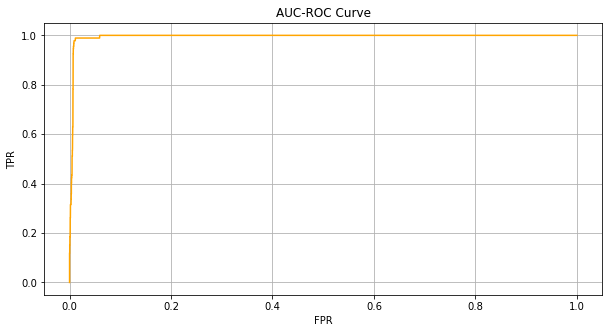

In [134]:
plt.figure(figsize=(10,5))
plt.plot(fpr,tpr,color='orange',)
plt.title("AUC-ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()

In [119]:
roc_auc_score(y_test, y_pred_proba)

0.9951218492372662

In [114]:
model_xgb = xgb.XGBClassifier(n_estimators=500,learning_rate=0.001)
model_xgb.fit(x_smote,y_smote)
print("accuracy : ",accuracy_score(y_test,model_xgb.predict(x_test)))
print(classification_report(y_true=y_test, y_pred=model_xgb.predict(x_test)))

C:\download\ANACONDAC\download\ANACONDA\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:26:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy :  0.7409571947559628
              precision    recall  f1-score   support

           0       1.00      0.74      0.85      6239
           1       0.04      0.75      0.08        92

    accuracy                           0.74      6331
   macro avg       0.52      0.75      0.46      6331
weighted avg       0.98      0.74      0.84      6331



In [115]:
y_pred = model_xgb.predict(x_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,4622,1617,6239
1,23,69,92
All,4645,1686,6331
